In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os

In [ ]:
df = pd.read_csv("Inputs/mnist_train.csv")

In [ ]:
df.describe()

In [103]:
#how many images of each digit do we have in the dataset

dig = [0,1,2,3,4,5,6,7,8,9]
num = []
for i in range(0,10):
    num.append(len(df[df['label']==i]))
    
d = {'Digit': dig, 'Count': num}
df1 = pd.DataFrame(data=d)
df1

,Digit,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


c:\Python3115\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python3115\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python3115\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


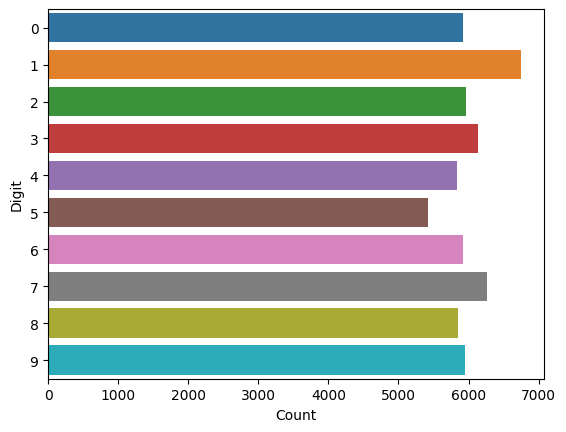

In [104]:
# how many images of each digit do we have in the dataset

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = 'Count', y = 'Digit', data = df1, orient='h')
plt.show()

In [105]:
# rows in the dataset do we have images of the digit “3”

df[df['label']==3].head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#print the image from row number 6

pic = df[6:7].values.reshape(785)[1:].reshape(28,28)
plt.imshow(pic,cmap='gray')

In [66]:
# Data Preparation

X = df.drop(['label'],axis=1)
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Data Preparation

y = df.label
y.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [68]:
import sklearn.model_selection as skmodel
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size=0.33, random_state=42)
print("length of all data is ","{:,}".format(len(X)))
print("length of training set is","{:,}".format(len(X_train)))
print("length of test set is","{:,}".format(len(X_test)))

length of all data is  60,000
length of training set is 40,200
length of test set is 19,800


In [69]:
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
25799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y_train.head()

25799    8
56172    6
7098     9
2602     6
15335    3
Name: label, dtype: int64

In [71]:
x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)
len(X_train)

40200

In [73]:
# Generate a random integer 'i' within the range of the length of 'X_train'

i = random.randint(0,(len(X_train)))
i

18246

In [75]:
print(y_train[i])

1


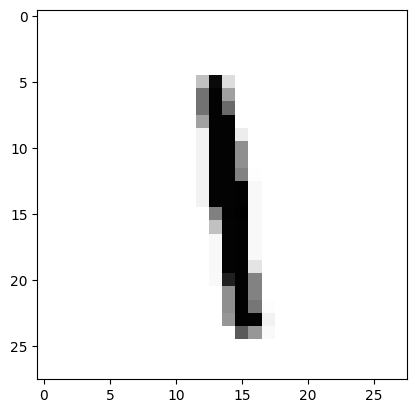

In [77]:
# Retrieve an image from 'X_train' at index 'i', reshape it to 28x28, and display it

pic = X_train.iloc[i].values.reshape(28,28)
plt.imshow(pic, cmap='Greys')

In [78]:
x_train.shape

(40200, 784)

In [79]:
# rReshape the training and testing data for compatibility with the CNN model

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the input shape for the CNN
input_shape = (28, 28, 1)

In [80]:
# Convert the data type of 'x_train' and 'x_test' to float32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [81]:
# Normalize pixel values to a range between 0 and 1

x_train /= 255
x_test /= 255

# Print information about the data
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (40200, 28, 28, 1)
Number of images in x_train 40200
Number of images in x_test 19800


In [82]:
#3. Modelling

# Create a Sequential model for the CNN
model = Sequential()

# Add a convolutional layer with 28 filters and a 3x3 kernel, specifying the input shape
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

# Add a max-pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 2D arrays for fully connected layers
model.add(Flatten())

# Add a dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation=tf.nn.relu))

# Add dropout with a rate of 0.2 to prevent overfitting
model.add(Dropout(0.2))

# Add a dense layer with 10 neurons for classification using softmax activation
model.add(Dense(10,activation=tf.nn.softmax))

In [84]:
# # Compile the model with 'adam' optimizer, sparse categorical crossentropy loss, and accuracy metric

model.compile(optimizer='adam', 
 loss='sparse_categorical_crossentropy', 
 metrics=['accuracy'])

In [85]:
# Train the model on the training data for 10 epochs

model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1257/1257 [==============================] - 30s 23ms/step - loss: 0.2531 - accuracy: 0.9234
Epoch 2/10
1257/1257 [==============================] - 29s 23ms/step - loss: 0.1024 - accuracy: 0.9694
Epoch 3/10
1257/1257 [==============================] - 29s 23ms/step - loss: 0.0679 - accuracy: 0.9789
Epoch 4/10
1257/1257 [==============================] - 29s 23ms/step - loss: 0.0496 - accuracy: 0.9842
Epoch 5/10
1257/1257 [==============================] - 31s 25ms/step - loss: 0.0381 - accuracy: 0.9877
Epoch 6/10
1257/1257 [==============================] - 28s 22ms/step - loss: 0.0326 - accuracy: 0.9886
Epoch 7/10
1257/1257 [==============================] - 28s 22ms/step - loss: 0.0265 - accuracy: 0.9910
Epoch 8/10
1257/1257 [==============================] - 28s 22ms/step - loss: 0.0244 - accuracy: 0.9917
Epoch 9/10
1257/1257 [==============================] - 27s 21ms/step - loss: 0.0205 - accuracy: 0.9928
Epoch 10/10
1257/1257 [==============================] - 32s 25m

In [86]:
model.evaluate(x_test, y_test)

619/619 [==============================] - 5s 7ms/step - loss: 0.0886 - accuracy: 0.9796


[0.08860928565263748, 0.9796464443206787]

In [96]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred.shape

619/619 [==============================] - 3s 4ms/step


(19800,)

Confusion matrix, without normalization
[[1919    1    7    2    2    2    8    0    1    4]
 [   0 2192   11    0    0    0    6    4    2    3]
 [   1    5 1920    2    2    0    1    7    0    3]
 [   0    1   25 1993    0    7    1    3    2    3]
 [   2    6    2    0 1854    0    6    9    1   38]
 [   5    2    0   18    0 1737   14    0   13   10]
 [   0    0    0    0    1    1 1977    0    1    0]
 [   2    3   26    9    2    0    0 2077    0    2]
 [   2    5   26    6    5    6    9   10 1817    8]
 [   6    1    1    4    7    2    1   14    1 1911]]


C:\Users\Armaan\AppData\Local\Temp\ipykernel_25208\1424962051.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


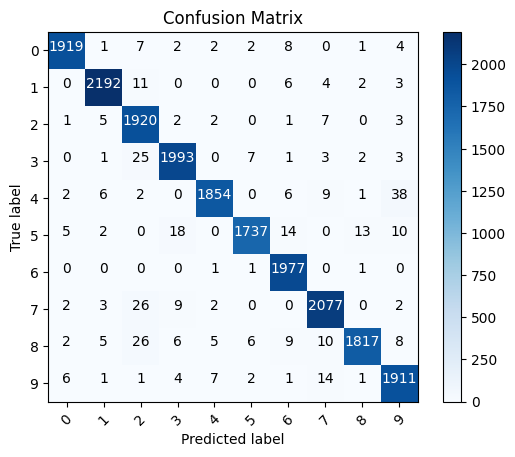

In [97]:
import sklearn.metrics as skmet
cm = skmet.confusion_matrix(y_true=y_test, y_pred=y_pred)
def plot_confusion_matrix(cm, classes,
 normalize=False,
 title='Confusion matrix',
 cmap=plt.cm.Blues):
 
 #This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.

 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)
print('Confusion matrix, without normalization')
print(cm)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
 plt.text(j, i, cm[i, j],
 horizontalalignment='center',
 color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [100]:
print('\033[1m The result is telling us that we have: ',(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]),'correct predictions.')
print('\033[1m The result is telling us that we have: ',(cm.sum()-(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])),'incorrect predictions.')
print('\033[1m We have total predictions of: ',(cm.sum()))

 The result is telling us that we have:  19397 correct predictions.
 The result is telling us that we have:  403 incorrect predictions.
 We have total predictions of:  19800


In [102]:
model.save('trained_params-tensorflow.h5')